In [1]:
# 特徴量を手動で設計してみよう

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pokemon = pd.read_csv('https://raw.githubusercontent.com/we-b/datasets_for_ai/master/pokemonn.csv')


In [3]:
pokemon.head()


,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,Bulbasaur,318,45,49,49,65,65,45,False
1,Ivysaur,405,60,62,63,80,80,60,False
2,Venusaur,525,80,82,83,100,100,80,False
3,Charmander,309,39,52,43,60,50,65,False
4,Charmeleon,405,58,64,58,80,65,80,False


In [4]:
pokemon.shape

(212, 9)

In [5]:
X0 = pokemon['HP']
X1 = pokemon['Attack']
X2 = pokemon['Defense']
X3 = pokemon['Sp. Atk']
X4 = pokemon['Sp. Def']
X5 = pokemon['Speed']

In [6]:
"""
補足 ddof = Delta Degrees of Freedom 

1点 覚えておくべき箇所は、pandas では分散 / 標準偏差について不偏推定量の計算が
デフォルトになっている。これは numpy の挙動 ( 標本統計量を返す ) とは異なる。
この挙動は pandas, numpy ともに ddof オプションで制御できる。

pandas : 不偏推定量の計算 ( ddof=True ) がデフォルト。
numpy : 標本統計量の計算 ( ddof=False ) がデフォルト。
"""



'\n補足 ddof = Delta Degrees of Freedom \n\n1点 覚えておくべき箇所は、pandas では分散 / 標準偏差について不偏推定量の計算が\nデフォルトになっている。これは numpy の挙動 ( 標本統計量を返す ) とは異なる。\nこの挙動は pandas, numpy ともに ddof オプションで制御できる。\n\npandas : 不偏推定量の計算 ( ddof=True ) がデフォルト。\nnumpy : 標本統計量の計算 ( ddof=False ) がデフォルト。\n'

In [7]:
# ポケモンの各種族値の偏差値を求めてみよう

In [8]:
W0 = ((X0 - X0.mean()) / X0.std(ddof=0)  * 10  + 50 )
W1 = ((X1 - X1.mean()) / X1.std(ddof=0)  * 10  + 50 )
W2 = ((X2 - X2.mean()) / X2.std(ddof=0)  * 10  + 50 )
W3 = ((X3 - X3.mean()) / X3.std(ddof=0)  * 10  + 50 )
W4 = ((X4 - X4.mean()) / X4.std(ddof=0)  * 10  + 50 )
W5 = ((X5 - X5.mean()) / X5.std(ddof=0)  * 10  + 50 )

In [9]:
"""
特徴量を追加しよう
複数の要素を追加して新たな一つの配列とする方法には、
NUMPYメソッドのvstackが有効です。


"""

'\n特徴量を追加しよう\n複数の要素を追加して新たな一つの配列とする方法には、\nNUMPYメソッドのvstackが有効です。\n\n\n'

In [10]:
X_new = np.vstack([X0, X1, X2,X3,X4,X5, W0, W1, W2, W3, W4, W5])

In [11]:
X_new

array([[  45.        ,   60.        ,   80.        , ...,   80.        ,
          80.        ,   80.        ],
       [  49.        ,   62.        ,   82.        , ...,  110.        ,
         160.        ,  110.        ],
       [  49.        ,   63.        ,   83.        , ...,   60.        ,
          60.        ,  120.        ],
       ..., 
       [  45.33479839,   49.23780842,   54.44182179, ...,   67.45185521,
          72.65586858,   62.24784184],
       [  45.98406903,   50.74036716,   57.082098  , ...,   66.59469427,
          66.59469427,   53.91123258],
       [  38.77076368,   43.8895956 ,   50.71470483, ...,   47.30215022,
          50.71470483,   47.30215022]])

In [12]:
X_new.shape

(12, 212)

In [13]:
X_new = X_new.T
X_new.shape

(212, 12)

In [14]:

from sklearn.feature_selection import SelectPercentile
from sklearn.cross_validation import train_test_split

/root/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
"""
既存の説明変数同士を作用させて、新たな特徴量にしよう
互いに関連性のありそうな説明変数同士を組み合わせて新たな特徴量とすることによって、
データの表現能力を高めることが可能です。



"""

'\n既存の説明変数同士を作用させて、新たな特徴量にしよう\n互いに関連性のありそうな説明変数同士を組み合わせて新たな特徴量とすることによって、\nデータの表現能力を高めることが可能です。\n\n\n\n'

In [16]:
A1 = X1*X3
A2 = X3*X4
A3 = X3*X5
A4 = X1*X5

In [17]:
X_new = np.vstack([X0, X1, X2, X3, X4, X5, W0, W1, W2, W3, W4, W5, A1, A2, A3, A4])
X_new = X_new.T
# X_new = X_new.reshape(151, 16)#(reshapeメソッドを使用する場合)
X_new

array([[    45.,     49.,     49., ...,   4225.,   2925.,   2205.],
       [    60.,     62.,     63., ...,   6400.,   4800.,   3720.],
       [    80.,     82.,     83., ...,  10000.,   8000.,   6560.],
       ..., 
       [    80.,    110.,     60., ...,  19500.,  10500.,   7700.],
       [    80.,    160.,     60., ...,  22100.,  13600.,  12800.],
       [    80.,    110.,    120., ...,  11700.,   9100.,   7700.]])

In [18]:
X_new.shape

(212, 16)

In [19]:
"""
説明変数の標準化を行おう
機械学習の精度を向上させるためには、このようにスケールの統一されていない
変数を全て同一のスケールに変換することが必要です。

そのために行う作業が、「標準化」と呼ばれる作業です。


"""

'\n説明変数の標準化を行おう\n機械学習の精度を向上させるためには、このようにスケールの統一されていない\n変数を全て同一のスケールに変換することが必要です。\n\nそのために行う作業が、「標準化」と呼ばれる作業です。\n\n\n'

In [20]:
def zscore(x):
    xmean = x.mean()
    xstd = np.std(x)
    
    zscore = (x-xmean )/xstd
    return zscore

In [21]:
X0 = zscore(X0)
X1 = zscore(X1)
X2 = zscore(X2)
X3 = zscore(X3)
X4 = zscore(X4)
X5 = zscore(X5)
W0 = zscore(W0)
W1 = zscore(W1)
W2 = zscore(W2)
W3 = zscore(W3)
W4 = zscore(W4)
W5 = zscore(W5)
A1 = zscore(A1)
A2 = zscore(A2)
A3 = zscore(A3)
A4 = zscore(A4)

In [22]:
X_new = np.vstack([X0, X1, X2, X3, X4, X5, W0, W1, W2, W3, W4, W5, A1, A2, A3, A4])
X_new = X_new.T
X_new

array([[-0.92056892, -1.06099165, -0.91690156, ..., -0.55987473,
        -0.80997902, -1.04482964],
       [-0.41653842, -0.68446667, -0.4653728 , ..., -0.13849027,
        -0.44570771, -0.72239405],
       [ 0.25550226, -0.10519747,  0.17966828, ...,  0.55897366,
         0.17598199, -0.11796035],
       ..., 
       [ 0.25550226,  0.70577941, -0.56212897, ...,  2.39950348,
         0.66167707,  0.12466445],
       [ 0.25550226,  2.15395241, -0.56212897, ...,  2.90322744,
         1.26393897,  1.21009118],
       [ 0.25550226,  0.70577941,  1.37299429, ...,  0.88833163,
         0.38968783,  0.12466445]])

In [23]:
X_new.shape


(212, 16)

In [24]:
"""
重要な特徴量のみを抽出しよう

このまま分析を行ってもいいのですが、説明変数の個数が非常に多いと、
モデルの形が非常に複雑になり、過学習のリスクが高まります。

モデルの汎化能力を高めるといった意味で、
特徴量の個数はなるべく減らした方が分析には都合がいいです。

そのため、目的変数の予測、分類に高い影響を与えている特徴量のみを選択する、
「自動特徴量選択」を行うことが求められています。


"""


'\n重要な特徴量のみを抽出しよう\n\nこのまま分析を行ってもいいのですが、説明変数の個数が非常に多いと、\nモデルの形が非常に複雑になり、過学習のリスクが高まります。\n\nモデルの汎化能力を高めるといった意味で、\n特徴量の個数はなるべく減らした方が分析には都合がいいです。\n\nそのため、目的変数の予測、分類に高い影響を与えている特徴量のみを選択する、\n「自動特徴量選択」を行うことが求められています。\n\n\n'

In [25]:
from sklearn.feature_selection import SelectPercentile
from sklearn.cross_validation import train_test_split

In [26]:
pokemon.target = pokemon['Legendary']
pokemon.target 

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
182     True
183     True
184     True
185     True
186     True
187     True
188     True
189     True
190     True
191     True
192     True
193     True
194     True
195     True
196     True
197     True
198     True
199     True
200     True
201     True
202     True
203     True
204     True
205     True
206     True
207     True
208     True
209     True
210     True
211     True
Name: Legendary, Length: 212, dtype: bool

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_new, pokemon.target, test_size=.3)

In [28]:
# こちらのコードで、SelectPercentileは、
# 特徴量の個数を指定された割合で減少させる作用があります。
# 今回では(percentile=50)と指定しているので、
# 特徴量の個数は半分減少することになります。

select = SelectPercentile(percentile=50)

In [29]:
select

SelectPercentile(percentile=50,
         score_func=<function f_classif at 0x7f7bd1a022f0>)

In [30]:
select.fit(X_train, y_train)


SelectPercentile(percentile=50,
         score_func=<function f_classif at 0x7f7bd1a022f0>)

In [31]:
X_train_selected = select.transform(X_train)


In [32]:
print("X_train.shape: {}".format(X_train.shape))


X_train.shape: (148, 16)


In [33]:
print("X_train_selected.shape: {}".format(X_train_selected.shape))


X_train_selected.shape: (148, 8)


In [34]:
"""
次に、maskメソッドを使用することで、どの特徴量が採用されたかを可視化します。

"""

'\n次に、maskメソッドを使用することで、どの特徴量が採用されたかを可視化します。\n\n'

[False False False  True  True False False False False  True  True False
  True  True  True  True]


([], <a list of 0 Text yticklabel objects>)

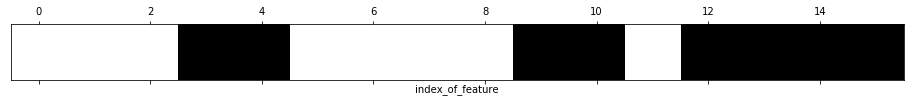

In [35]:
mask = select.get_support()
print(mask)

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("index_of_feature")
plt.yticks(())

In [36]:
"""
まずは、特徴量の個数を減らさなかった場合における、ロジスティック回帰を適用した
場合の正答率、混合行列の結果を求めます。


"""

'\nまずは、特徴量の個数を減らさなかった場合における、ロジスティック回帰を適用した\n場合の正答率、混合行列の結果を求めます。\n\n\n'

In [37]:
from sklearn.linear_model import LogisticRegression
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))

Score with all features: 1.000


In [38]:
y_p = lr.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_p)

array([[44,  0],
       [ 0, 20]])

In [39]:
# 同様に、特徴量の個数を減らした場合でも、
# 同様にロジスティック回帰による正答率、混合行列の結果を確認します。

lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

Score with only selected features: 0.938


In [40]:
y_p = lr.predict(X_test_selected)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_p)

array([[43,  1],
       [ 3, 17]])